In [1]:
import pandas as pd
import numpy as np
import sqlite3
from pprint import pprint
import seaborn as sb
import pandas_profiling
# import altair as alt
# from multiprocessing import Pool
# alt.renderers.enable('notebook')
import folium
from folium import plugins
from folium.plugins import HeatMap
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# import pygeohash as pgh
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plot_options = dict(figsize=(12,6))

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("Fires.csv")
df.head()


e:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,NaN


In [6]:
len(df.columns)

39

In [4]:
#dropping columns that will have little to no effect on model performance or contain NaN values
drop_cols = ['OBJECTID', 'FOD_ID', 'FPA_ID','NWCG_REPORTING_UNIT_ID','NWCG_REPORTING_UNIT_NAME','SOURCE_REPORTING_UNIT','SOURCE_REPORTING_UNIT_NAME','LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID','FIRE_CODE','FIRE_NAME','ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME','COMPLEX_NAME','DISCOVERY_DATE','STAT_CAUSE_CODE','FIPS_CODE', 'FIPS_NAME', 'Shape','OWNER_CODE','DISCOVERY_TIME','COUNTY','CONT_DATE','CONT_DOY','CONT_TIME','SOURCE_SYSTEM','SOURCE_SYSTEM_TYPE']
df = df.drop(columns=drop_cols)
print(len(drop_cols))
df.head()

29


,NWCG_REPORTING_AGENCY,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
0,FS,2005,33,Miscellaneous,0.10,A,40.036944,-121.005833,USFS,CA
1,FS,2004,133,Lightning,0.25,A,38.933056,-120.404444,USFS,CA
2,FS,2004,152,Debris Burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA
3,FS,2004,180,Lightning,0.10,A,38.559167,-119.913333,USFS,CA
4,FS,2004,180,Lightning,0.10,A,38.559167,-119.933056,USFS,CA


In [12]:
# Pre-processing min, max, median, std, IQR
df_fire_size = df['FIRE_SIZE']
# Number of objects
numObj = df_fire_size.count()
print('count', numObj)
# The minimum value
minValue = df_fire_size.min()
print('min', minValue)
# The maximum value
maxValue = df_fire_size.max()
print('max', maxValue)
# The mean value
mean = df_fire_size.mean()
print('mean', mean)
# The standard deviation value
stdev = df_fire_size.std()
print('std', stdev)
# The Q1 value
Q1 = df_fire_size.quantile(1 / 4)
print('Q1', Q1)
# The median value
median = df_fire_size.median()
print('median', median)
# The Q3 value
Q3 = df_fire_size.quantile(3/4)
print('Q3', Q3)
# The IQR value
IQR = Q3 - Q1
print('IQR', IQR)

df_fire_size = (df.loc[df['FIRE_SIZE'] < 5000])['FIRE_SIZE']
# Number of objects
numObj = df_fire_size.count()
print('count', numObj)
# The minimum value
minValue = df_fire_size.min()
print('min', minValue)
# The maximum value
maxValue = df_fire_size.max()
print('max', maxValue)
# The mean value
mean = df_fire_size.mean()
print('mean', mean)
# The standard deviation value
stdev = df_fire_size.std()
print('std', stdev)
# The Q1 value
Q1 = df_fire_size.quantile(1 / 4)
print('Q1', Q1)
# The median value
median = df_fire_size.median()
print('median', median)
# The Q3 value
Q3 = df_fire_size.quantile(3/4)
print('Q3', Q3)
# The IQR value
IQR = Q3 - Q1
print('IQR', IQR)

count 1880465
min 1e-05
max 606945.0
mean 74.520158339107
std 2497.598179804576
Q1 0.1
median 1.0
Q3 3.3
IQR 3.1999999999999997
count 1876013
min 1e-05
max 3997.0
mean 18.019818733357205
std 137.13413421547963
Q1 0.1
median 1.0
Q3 3.08
IQR 2.98


In [5]:
# separation of training and testing data 
label_names = sorted(df['STAT_CAUSE_DESCR'].unique())
df_dummies_X = df.drop(columns=['STAT_CAUSE_DESCR'])
df_dummies_X = pd.get_dummies(df_dummies_X)
X = df_dummies_X
Y = df['STAT_CAUSE_DESCR']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1, stratify=Y)

In [10]:
df_dummies_X = df.drop(columns=['STAT_CAUSE_DESCR'])
df_dummies_X = pd.get_dummies(df_dummies_X)
X = df_dummies_X
Y = df['STAT_CAUSE_DESCR']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1, stratify=Y)


classifier = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_leaf=50, random_state=123)

classifier.fit(X_train, Y_train)
training_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
print(training_accuracy)

pred = classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, pred)
print(test_accuracy)

0.5447438089337833
0.5399395894100661


In [9]:
pandas_profiling.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


In [ ]:
# Removing missing values
df = df.loc[df['FIRE_SIZE'] not None]

In [5]:
# Splitting test and training
df = df.loc[df['FIRE_SIZE'] < 5000]
df = df.sample(n=100000)
df_dummies_X = df.drop(columns=['STAT_CAUSE_DESCR'])
df_dummies_X = pd.get_dummies(df_dummies_X)
X = df_dummies_X
Y = df['STAT_CAUSE_DESCR']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=42, stratify=Y)

In [10]:
# Univariate feature selection
X_5_best= SelectKBest(chi2, k=5).fit(X_train, Y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = []
for bool, feature in zip(mask, X_train.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 5 best features

ValueError: Input X must be non-negative.

In [11]:
# Recursive feature elimination (RFE)
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(random_state = 42)
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train, Y_train)
rfe_mask = selector.get_support() #list of booleans for selected features
new_features = [] 
for bool, feature in zip(rfe_mask, X_train.columns):
    if bool:
        new_features.append(feature)
new_features # The list of your 5 best features

e:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['FIRE_YEAR', 'DISCOVERY_DOY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE']

In [ ]:
# Recursive feature elimination with cross-validation (RFECV)
from sklearn.feature_selection import RFECV
cv_estimator = RandomForestClassifier(random_state =42)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
cv_estimator.fit(X_train, Y_train)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(X_train, Y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, X_train.columns):
    if bool:
        rfecv_features.append(feature)
print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

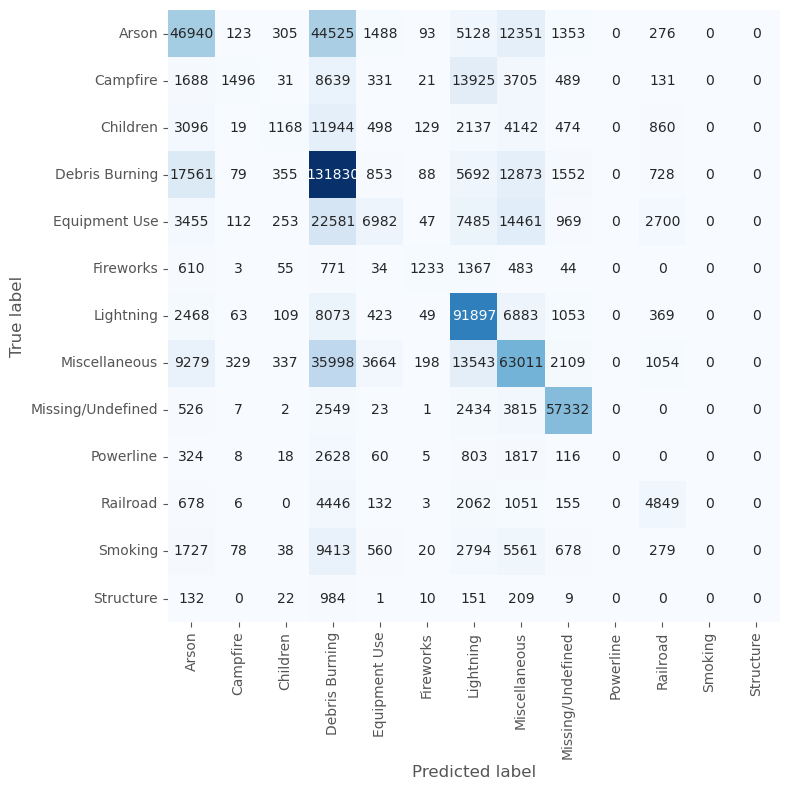

In [29]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
# import altair as alt
label_names = sorted(df['STAT_CAUSE_DESCR'].unique())

matrix = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8,8))
sb.heatmap(matrix,square=True,annot=True, fmt='d', cbar=False, cmap='Blues',
          xticklabels=label_names,yticklabels=label_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig("randomforestconfusionmatrix.png", dpi=170)